In [1]:
from udntools.region import CompServiceRegion
import matplotlib.pyplot as plt
import numpy as np
from udntools.utils import cdf_y_axis

In [2]:
comp_service_region = CompServiceRegion(0, 100, 0, 100,
                                        100, 10000,
                                        ue_sigma=5)

In [3]:
# 设定仿真的信干比区间
x_axis = np.arange(-10, 20.5, 0.5)


comp_service_region.cluster_by_dfs(0)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_0 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)

comp_service_region.cluster_by_dfs(3)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_3 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)

comp_service_region.cluster_by_dfs(5)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_5 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)

comp_service_region.cluster_by_dfs(7)
comp_service_region.sir_array_sim(iteration=1)
cdf_dfs_7 = cdf_y_axis(x_axis, comp_service_region.sir_db_array)

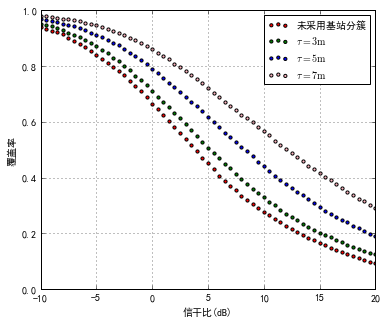

In [4]:
fig = plt.figure(figsize=(6, 5))
# 使能中文字体

# -*- coding:utf-8 -*-
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

f0 = plt.scatter(x_axis, 1 - cdf_dfs_0, s = 10, c='r')
f3 = plt.scatter(x_axis, 1 - cdf_dfs_3, s = 10, c='g')
f5 = plt.scatter(x_axis, 1 - cdf_dfs_5, s = 10, c='b')
f7 = plt.scatter(x_axis, 1 - cdf_dfs_7, s = 10, c='lightpink')
plt.xlim(-10, 20)
plt.ylim(0,1)
plt.grid(True)

# 加图例
plt.legend(handles=[f0,
                    f3,
                    f5,
                    f7], 
           labels=[r"未采用基站分簇",
                   r"$\tau=3\mathrm{m}$",
                   r"$\tau=5\mathrm{m}$",
                   r"$\tau=7\mathrm{m}$"], 
           loc='best',
           prop={'size': 10})

# 加坐标轴标签
plt.xlabel("信干比(dB)",fontproperties = 'SimHei', size=13)
plt.ylabel("覆盖率",fontproperties = 'SimHei', size=13)

# 存储成pdf
fig.savefig('pc_dfs_zfbf_show.pdf')

plt.show()